In [84]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn import model_selection
from sklearn import metrics
import numpy as np
from sklearn import neighbors

In [7]:
dfAAPL = pd.read_csv('Twitter_volume_AAPL.csv')
dfAMZN = pd.read_csv('Twitter_volume_AMZN.csv')
dfCRM = pd.read_csv('Twitter_volume_CRM.csv')
dfFB = pd.read_csv('Twitter_volume_FB.csv')

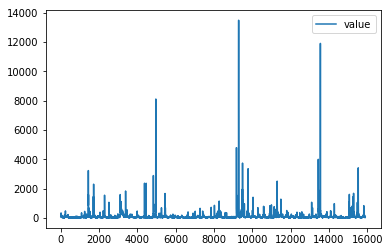

In [9]:
dfAAPL.plot()

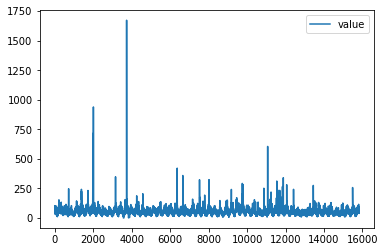

In [10]:
dfAMZN.plot()

In [38]:
df = pd.merge(dfAAPL, dfAMZN, on='timestamp')
df.rename(columns = {'value_x' : 'AAPL', 'value_y' : 'AMZN'}, inplace = True)

In [39]:
df = pd.merge(df, dfCRM, on='timestamp')
df.rename(columns = {'value' : 'CRM'}, inplace = True)

In [41]:
df = pd.merge(df, dfFB, on='timestamp')
df.rename(columns = {'value': 'FB'}, inplace = True)

In [42]:
df.head()

,timestamp,AAPL,AMZN,CRM,FB
0,2015-02-26 21:42:53,104,57,11,53
1,2015-02-26 21:47:53,100,43,10,64
2,2015-02-26 21:52:53,99,55,3,49
3,2015-02-26 21:57:53,154,64,4,48
4,2015-02-26 22:02:53,120,93,9,22


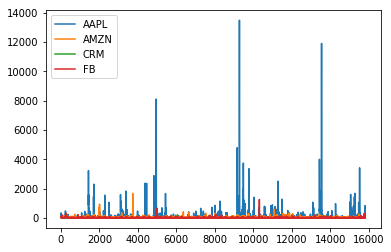

In [43]:
df.plot()

In [48]:
'''There doesn't seem to be any correlation between the values.
I will try to remove some of the seasonality w/ Moving Averages.
'''

In [52]:
dfAAPL['MA'] = dfAAPL.value.rolling(5, min_periods = 0).mean()

In [54]:
dfAAPL['Spread'] = dfAAPL.value - dfAAPL.MA

In [61]:
dfAAPL['SpreadMA'] = dfAAPL.Spread.rolling(5, min_periods = 0).mean()

In [62]:
dfAAPL.head()

,timestamp,value,MA,Spread,SpreadMA
0,2015-02-26 21:42:53,104,104.00,0.00,0.000000
1,2015-02-26 21:47:53,100,102.00,-2.00,-1.000000
2,2015-02-26 21:52:53,99,101.00,-2.00,-1.333333
3,2015-02-26 21:57:53,154,114.25,39.75,8.937500
4,2015-02-26 22:02:53,120,115.40,4.60,8.070000
5,2015-02-26 22:07:53,90,112.60,-22.60,3.550000
6,2015-02-26 22:12:53,92,111.00,-19.00,0.150000
7,2015-02-26 22:17:53,71,105.40,-34.40,-6.330000
8,2015-02-26 22:22:53,339,142.40,196.60,25.040000
9,2015-02-26 22:27:53,178,154.00,24.00,28.920000


In [85]:
clf = neighbors.LocalOutlierFactor()

In [66]:
x_train, x_test = model_selection.train_test_split(dfAAPL)

In [87]:
fitted = clf.fit(train)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [90]:
test = fitted.fit_predict(train)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [93]:
test = pd.DataFrame(test)

In [96]:
negone = test[test == -1]

In [99]:
negone.dropna()
negone.count()

0    1591
dtype: int64